# Kaggle Titanic Random Forest model

In this notebook, I will abroach the same problem using the Random Forest Model

In [1]:
# Let's start by importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# Let's import the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, auc, precision_score, f1_score, recall_score, roc_curve

In [3]:
# Let's import the data
df=pd.read_csv('./data/train.csv')

In [4]:
# Let's do some engineering. It will be best to encode the categorical variables and fill missing values

# First, let's check for missing values
print(df.isnull().sum())

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Let's drop the column that do not bring any value
df.drop(['PassengerId','Ticket', 'Name', 'Cabin'], axis=1, inplace=True)


In [6]:
# A further data engineering is necessary. Let's define again the family and using the SibSp and Parch +1 to define a new column
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

# Let's drop the 'SibSp' and 'Parch' columns
# df = df.drop(['SibSp', 'Parch'], axis=1)


In [7]:
# Since we know already what is in the dataset, let's starting by considering the actual data
X=df.drop('Survived', axis=1)
y=df['Survived']
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Family_Size
0,0,3,22.0,1,0,7.2500,True,False,True,2
1,1,1,38.0,1,0,71.2833,False,False,False,2
2,1,3,26.0,0,0,7.9250,False,False,True,1
3,1,1,35.0,1,0,53.1000,False,False,True,2
4,0,3,35.0,0,0,8.0500,True,False,True,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,True,False,True,1
887,1,1,19.0,0,0,30.0000,False,False,True,1
888,0,3,28.0,1,2,23.4500,False,False,True,4
889,1,1,26.0,0,0,30.0000,True,False,False,1


In [8]:
# let's define the train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Let's call the model, we call it rfc, and we will train it
clf=RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

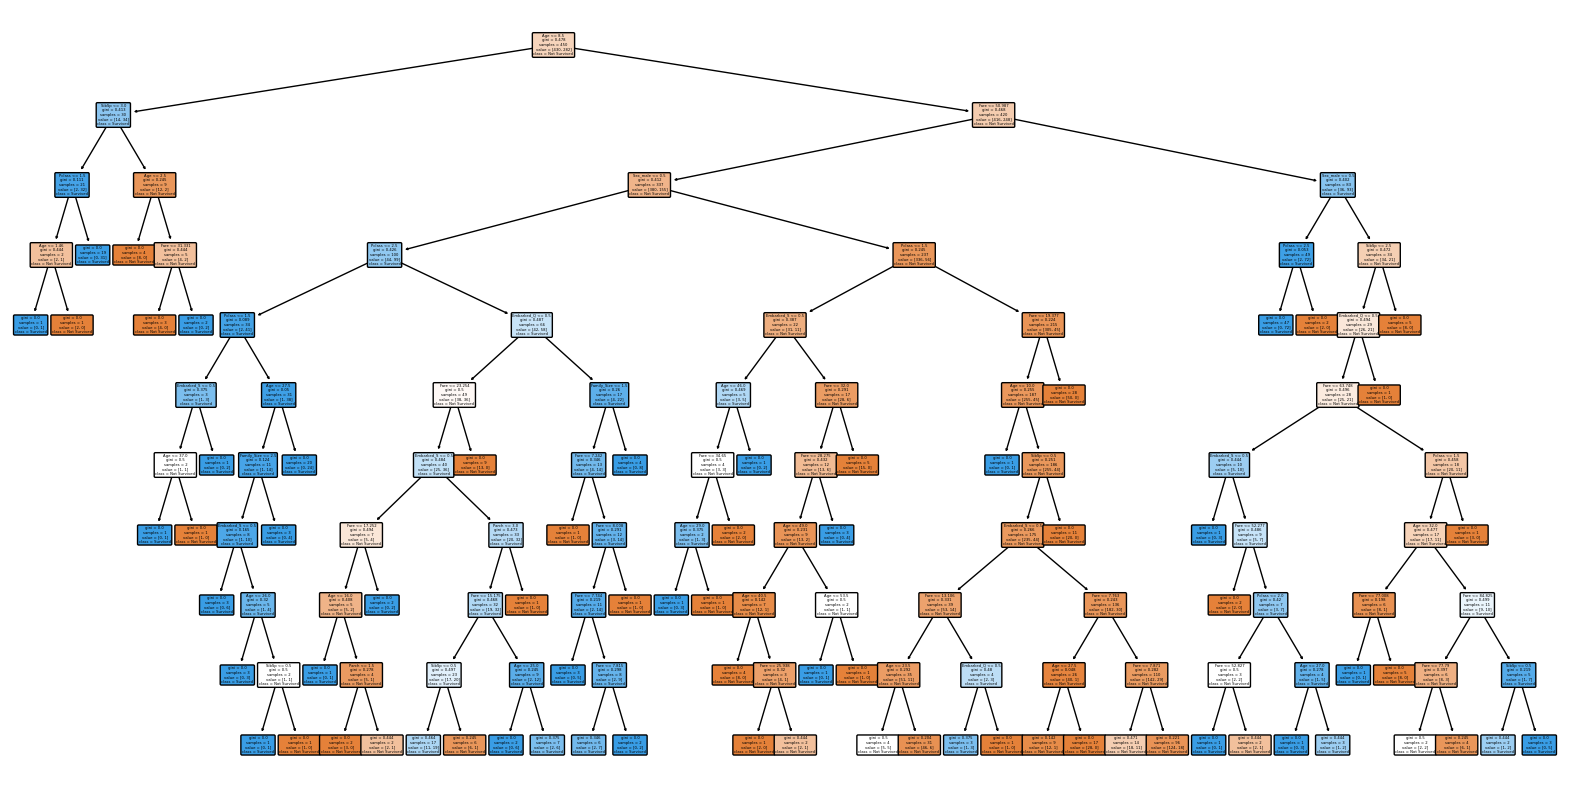

In [10]:
# Let's plot the random forest classifier diagram
plt.figure(figsize=(20, 10))  # optional: adjust size for readability
plot_tree(clf.estimators_[1], 
          feature_names=X_train.columns, 
          class_names=['Not Survived', 'Survived'], 
          filled=True, 
          rounded=True)
plt.show()


In [11]:
# Now that the model is trained, let's evaluate its performance
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))    

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



<Axes: >

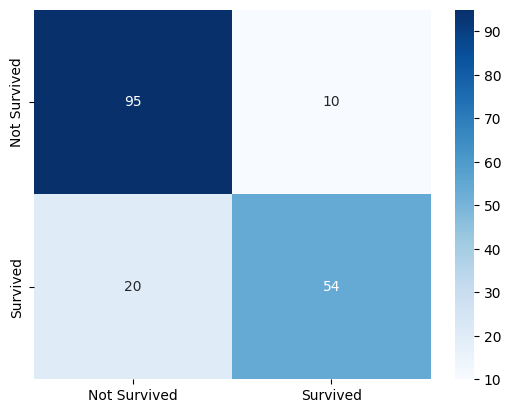

In [12]:
# Let's plot the confusion matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])

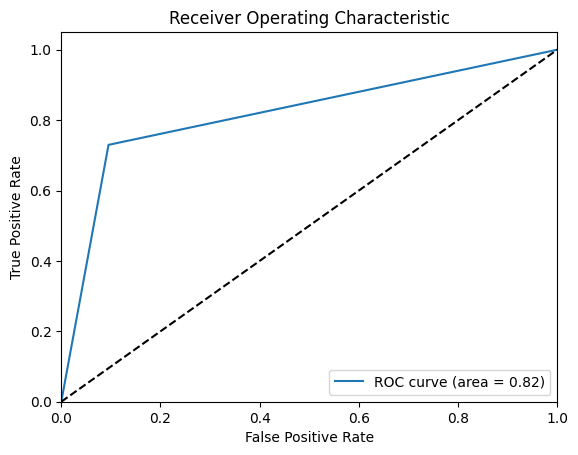

In [13]:
# Let's see the auc curve and plot the curve
auc_score = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [14]:
# Let's check the feature importance
importances = clf.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)


       Feature  Importance
5     Sex_male    0.319289
4         Fare    0.232092
1          Age    0.195534
0       Pclass    0.100596
8  Family_Size    0.059719
2        SibSp    0.031390
3        Parch    0.027063
7   Embarked_S    0.023654
6   Embarked_Q    0.010664


In [15]:
# the value obtained is less compared to the one from Logistic regression. Let's try to improve by using the grid search

In [21]:
# Let's test the model using the test.csv data set
test_df = pd.read_csv('./data/test.csv')

# dropping the PassengerId column and save it
passenger_id_test = test_df["PassengerId"]

# Let's data engineer the test set in the same way as we did with the training set
test_df.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

# Fixing the Age missing data
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())

#fixing Fare
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())


# Fixing the missing Embarked data
test_df["Embarked"] = test_df["Embarked"].fillna(test_df["Embarked"].mode()[0])

# Categorizing the sex and the embarked
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# creating the FamilySize feature
test_df["Family_Size"] = test_df["SibSp"] + test_df["Parch"] + 1

print(test_df.isnull().sum())

Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Family_Size    0
dtype: int64


In [22]:
# We run the model on the test set test_df to predict the survival
prediction_clf=clf.predict(test_df)

In [24]:
# Prepare the output
output = pd.DataFrame({'PassengerId': passenger_id_test, 'Survived': prediction_clf})
output.to_csv('submission_clf.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
